In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy.polynomial import chebyshev
from cycler import cycler

from pdswe import PDSWE



import os, sys
folder_to_add = os.path.abspath(os.path.join('..', 'classical_wall'))
if folder_to_add not in sys.path:
    sys.path.insert(0, folder_to_add)


from pcswe_wall import PCSWE_wall

In [2]:

factor = 0.9
h_fx = lambda x: factor*x
h_fx_dx = lambda x: factor
h_fx_dxx = lambda x: 0


pdswe = PDSWE()
pdswe.H = 7.12
pdswe.A = 0.72
pdswe.L = 8e3
pdswe.r = 0.45
pdswe.tol = 1e-7

pdswe.a_r = 0.01
pdswe.dL = 0

pdswe.h_fx = h_fx
pdswe.h_fx_dx = h_fx_dx
pdswe.h_fx_dxx = h_fx_dxx


pdswe.set_derivative_vars()
pdswe.solve()




   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.48e-07       1.99e-27         1000            126      
       2          9.61e-08       2.94e-30         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.61e-08 
Maximum boundary residual: 2.94e-30


In [3]:

pcswe = PCSWE_wall()
pcswe.H = 7.12
pcswe.A = 0.72
pcswe.L = 8e3
pcswe.r = 0.45
pcswe.tol = 1e-7

pcswe.h_fx = h_fx
pcswe.h_fx_dx = h_fx_dx
pcswe.h_fx_dxx = h_fx_dxx


pcswe.set_derivative_vars()
pcswe.solve()


   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          5.61e-08       8.53e-27         2000             0       
Solved in 1 iterations, number of nodes 2000. 
Maximum relative residual: 5.61e-08 
Maximum boundary residual: 8.53e-27


   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.02e-07       2.16e-27         1000             1       
       2          9.99e-08       3.74e-31         1001             0       
Solved in 2 iterations, number of nodes 1001. 
Maximum relative residual: 9.99e-08 
Maximum boundary residual: 3.74e-31
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.27e-07       9.97e-28         1000            126      
       2          9.80e-08       1.78e-29         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.80e-08 
Maximum boundary residual: 1.78e-29
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.48e-07       2.65e-27         1000            126      
       2          9.61e-08       2.10e-30         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.

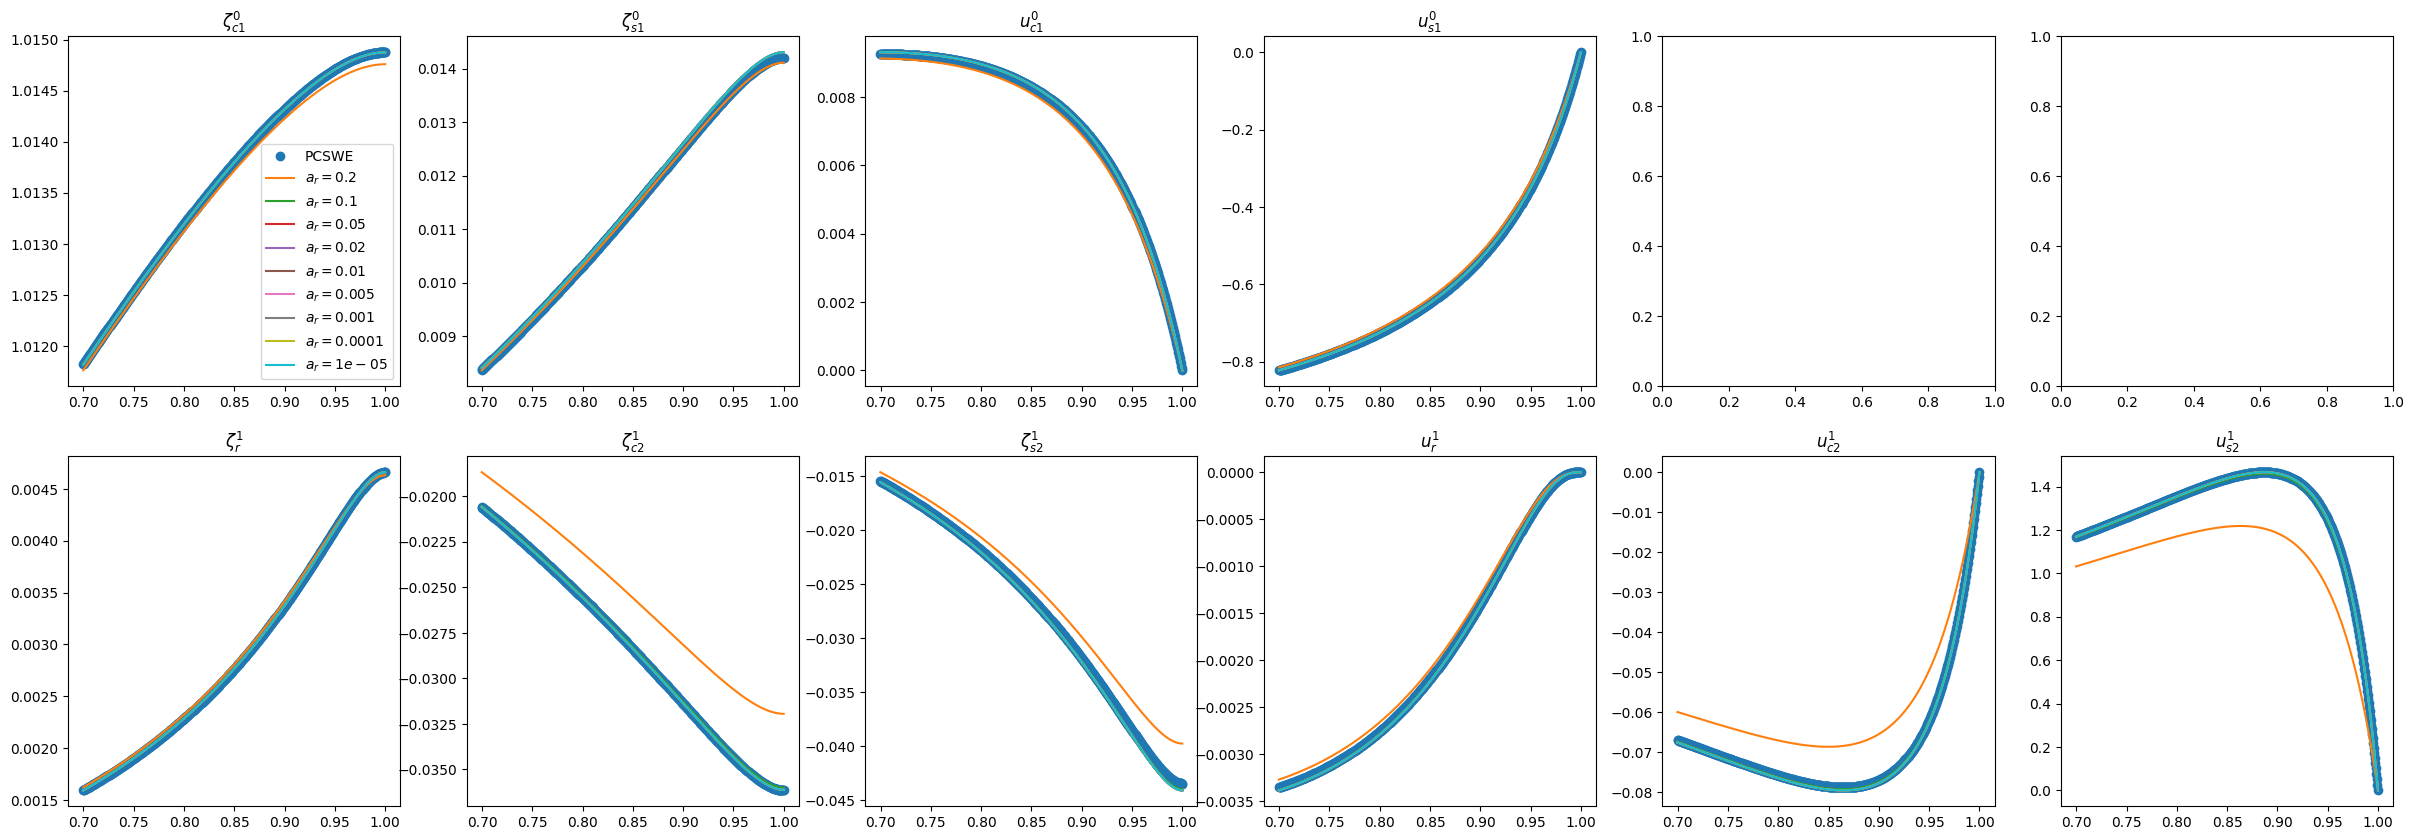

In [4]:
fig, axs = plt.subplots(2, 6, figsize=(30, 10))

bnd = 0.7


# pcswe.visualize_sol(0.7, axs=axs)


st = np.argmin(abs(pcswe.y.x - bnd))
for i in range(4):
    axs[0, i].plot(pcswe.y.x[st:], pcswe.y.y[i][st:], 'o')
for i in range(6):
    axs[1, i].plot(pcswe.y.x[st:], pcswe.y.y[4 + i][st:], 'o')



ars = [0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.001, 0.0001, 0.00001]
# ars = [0.1, 0.01, 0.001, 0.0001]
for a_r in ars:
    pdswe.a_r = a_r
    pdswe.set_derivative_vars()
    pdswe.solve()
    
    pdswe.visualize_components(bnd, axs=axs)
    # pdswe.visualize_defina_vars(0.7, axs=axs2)



axs[0, 0].legend(["PCSWE"] + [r"$a_r = {}$".format(ar) for ar in ars])

plt.show()

# pdswe.visualize_components(0.9)
# pdswe.visualize_amplitudes(0)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.02e-07       2.16e-27         1000             1       
       2          9.99e-08       3.74e-31         1001             0       
Solved in 2 iterations, number of nodes 1001. 
Maximum relative residual: 9.99e-08 
Maximum boundary residual: 3.74e-31
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.27e-07       9.97e-28         1000            126      
       2          9.80e-08       1.78e-29         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.80e-08 
Maximum boundary residual: 1.78e-29
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.48e-07       2.65e-27         1000            126      
       2          9.61e-08       2.10e-30         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.

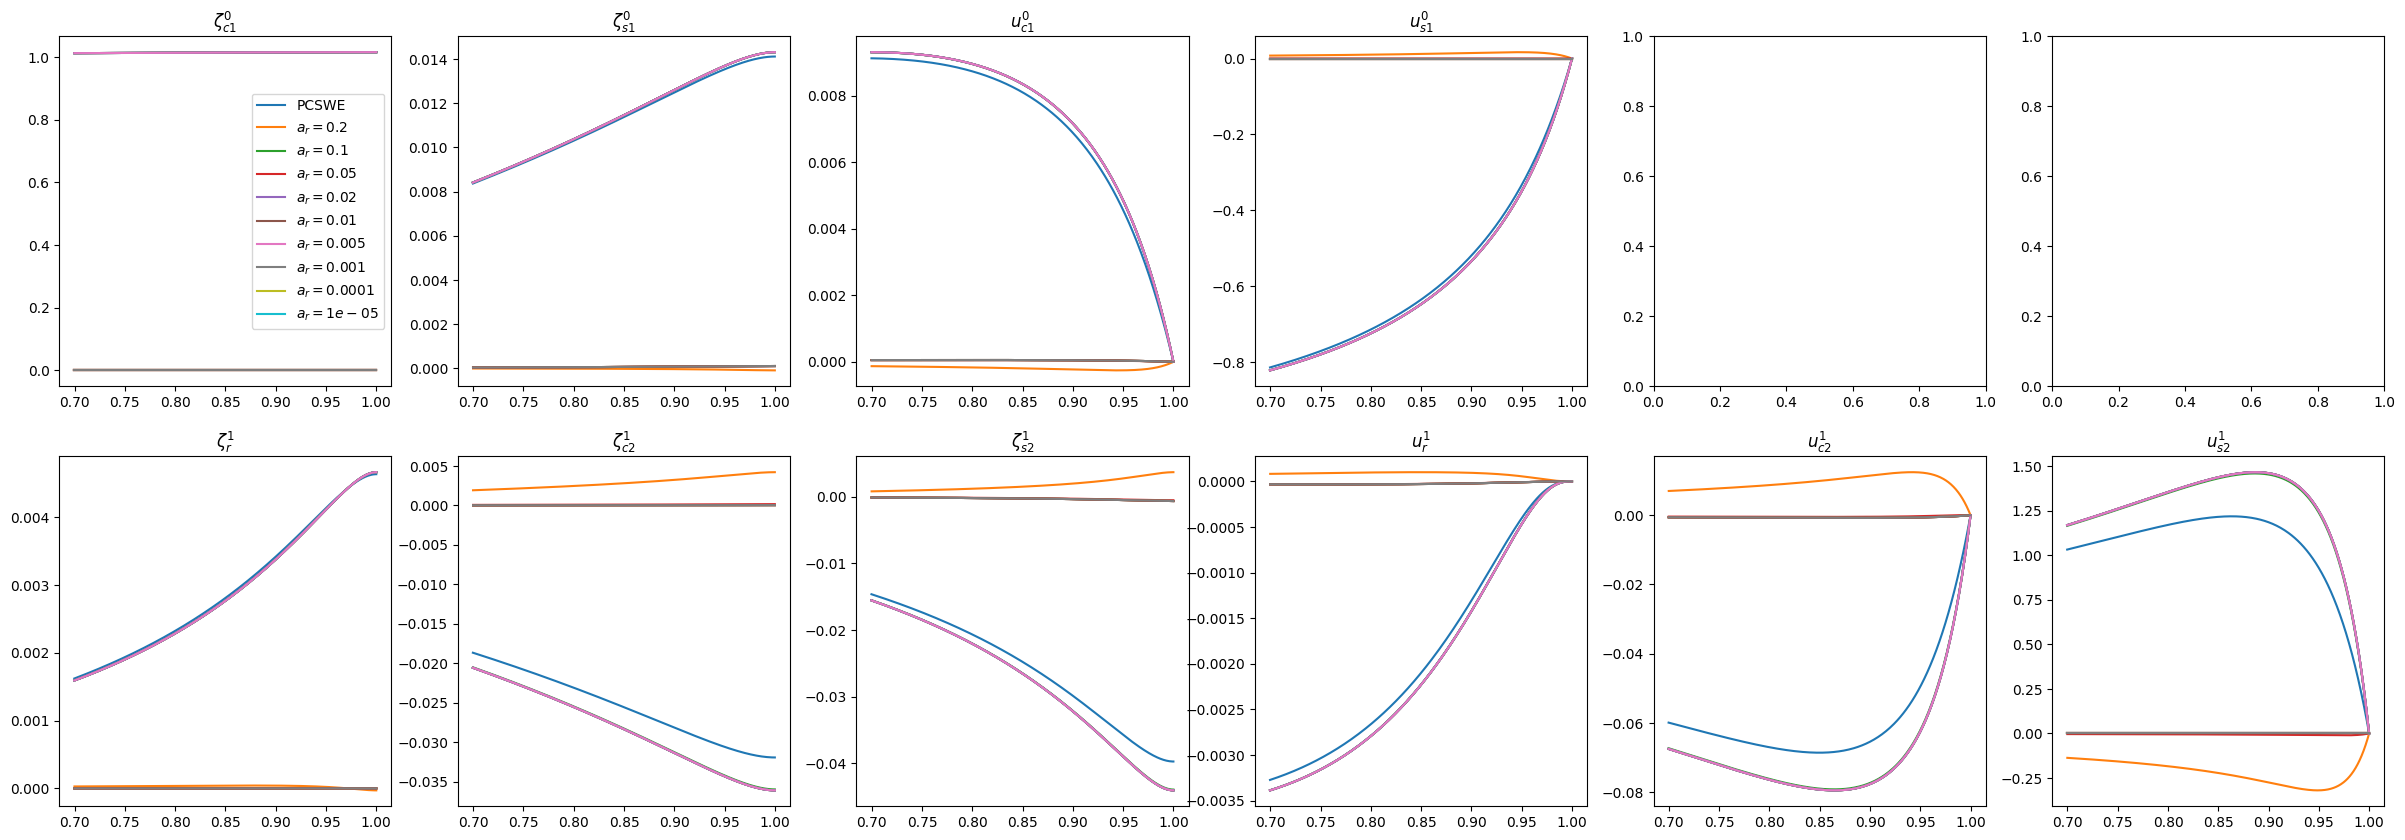

In [5]:
fig, axs = plt.subplots(2, 6, figsize=(30, 10))

bnd = 0.7


# pcswe.visualize_sol(0.7, axs=axs)


st = np.argmin(abs(pcswe.y.x - bnd))


ars = [0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.001, 0.0001, 0.00001]
# ars = [0.1, 0.01, 0.001, 0.0001]
for a_r in ars:
    pdswe.a_r = a_r
    pdswe.set_derivative_vars()
    pdswe.solve()
    
    pdswe.visualize_components(bnd, axs=axs)

    for i in range(4):
        axs[0, i].plot(pcswe.y.x[st:], pdswe.y.sol(pcswe.y.x[st:])[i] - pcswe.y.y[i][st:])
    for i in range(6):
        axs[1, i].plot(pcswe.y.x[st:], pdswe.y.sol(pcswe.y.x[st:])[4+i] - pcswe.y.y[4+i][st:])

    # pdswe.visualize_defina_vars(0.7, axs=axs2)



axs[0, 0].legend(["PCSWE"] + [r"$a_r = {}$".format(ar) for ar in ars])

plt.show()

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.02e-07       2.16e-27         1000             1       
       2          9.99e-08       3.74e-31         1001             0       
Solved in 2 iterations, number of nodes 1001. 
Maximum relative residual: 9.99e-08 
Maximum boundary residual: 3.74e-31
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.27e-07       9.97e-28         1000            126      
       2          9.80e-08       1.78e-29         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.80e-08 
Maximum boundary residual: 1.78e-29
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.48e-07       2.65e-27         1000            126      
       2          9.61e-08       2.10e-30         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.

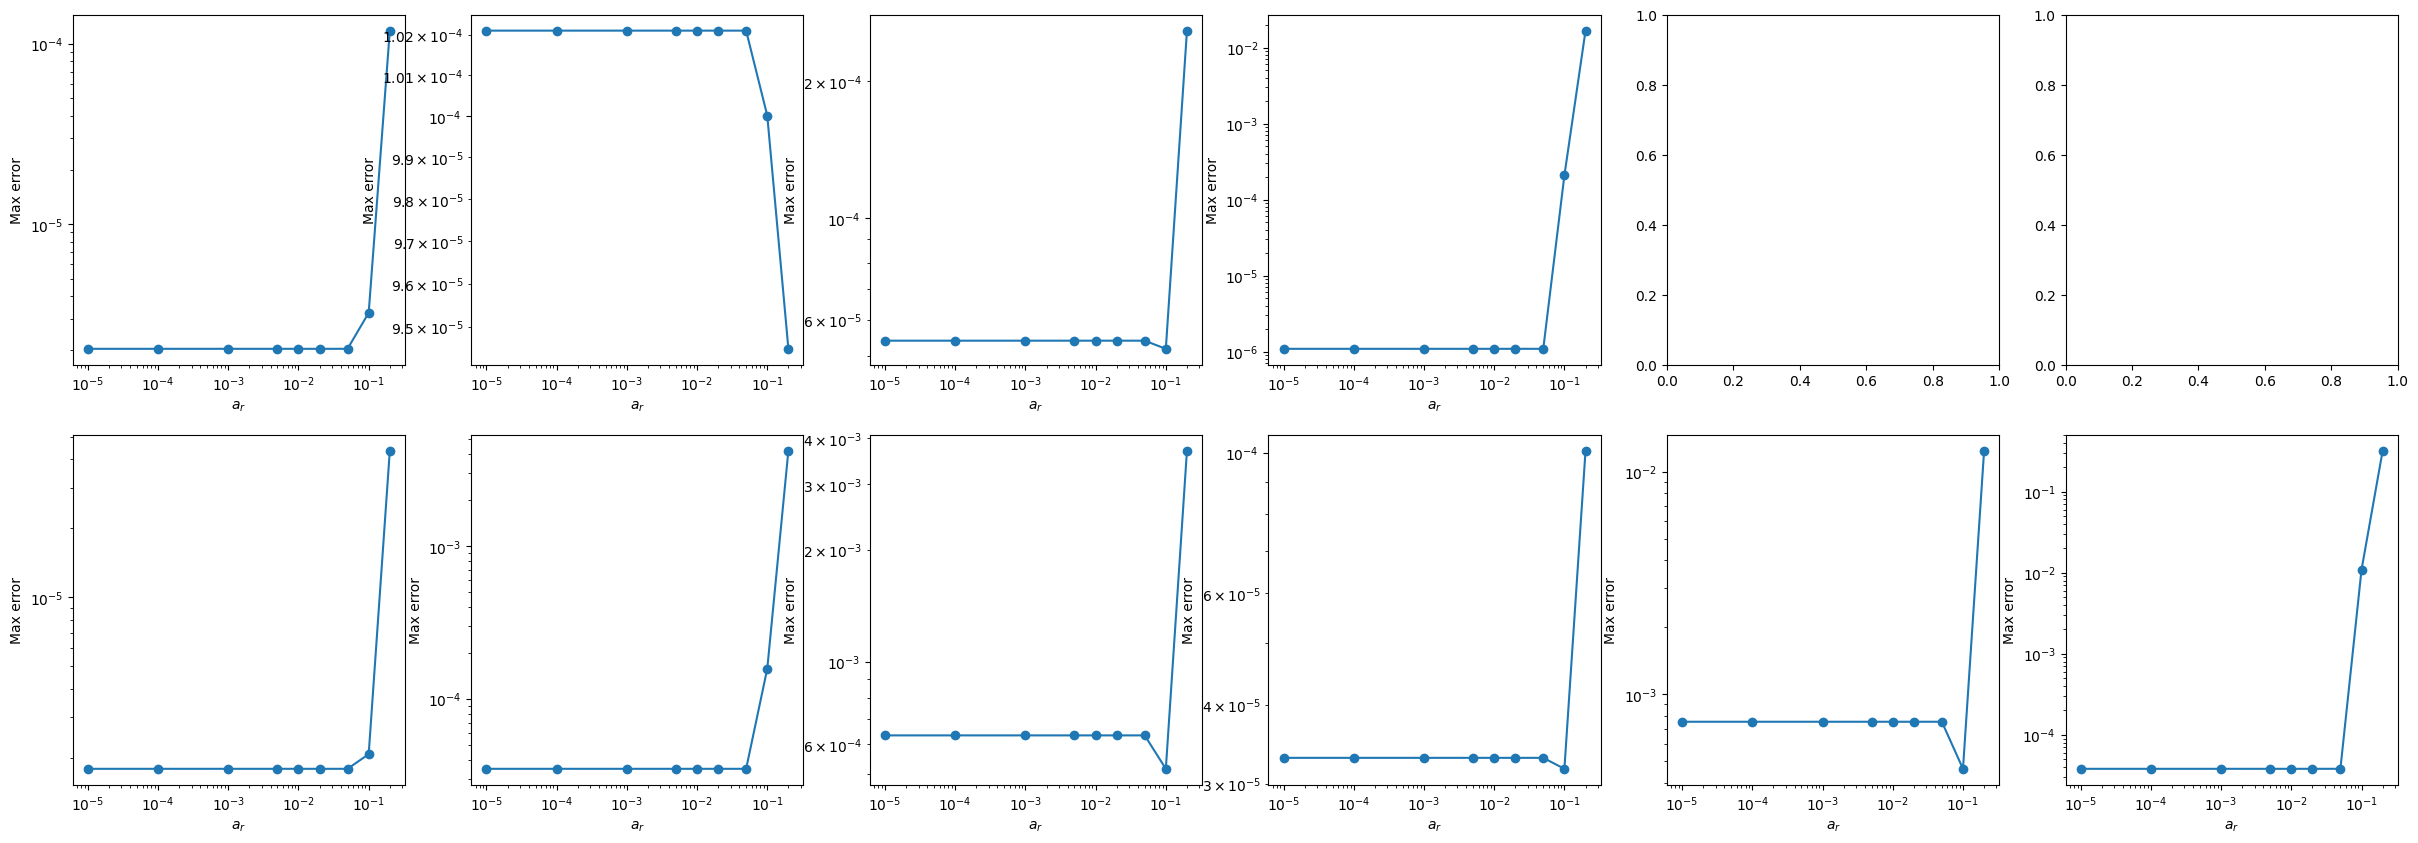

In [6]:

bnd = 0.7


# pcswe.visualize_sol(0.7, axs=axs)


st = np.argmin(abs(pcswe.y.x - bnd))


ars = [0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.001, 0.0001, 0.00001]


max_errs = []
# ars = [0.1, 0.01, 0.001, 0.0001]
for a_r in ars:
    pdswe.a_r = a_r
    pdswe.set_derivative_vars()
    pdswe.solve()
    
    pdswe.visualize_components(bnd, axs=axs)

    max_errs.append([])
    

    for i in range(4):
        max_errs[-1].append(max(abs(pdswe.y.sol(pcswe.y.x[st:])[i] - pcswe.y.y[i][st:])))
    for i in range(6):
        max_errs[-1].append(max(abs(pdswe.y.sol(pcswe.y.x[st:])[4+i] - pcswe.y.y[4+i][st:])))

    # pdswe.visualize_defina_vars(0.7, axs=axs2)



fig, axs = plt.subplots(2, 6, figsize=(30, 10))

for i in range(4):
    axs[0, i].loglog(ars, [max_err[i] for max_err in max_errs], 'o-')
    axs[0, i].set_ylabel("Max error")
    axs[0, i].set_xlabel("$a_r$")
for i in range(6):
    axs[1, i].loglog(ars, [max_err[4+i] for max_err in max_errs], 'o-')
    axs[1, i].set_ylabel("Max error")
    axs[1, i].set_xlabel("$a_r$")
plt.show()